# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 2</span>


### Exercise 02.1
- Compute the following 1D integral via Monte Carlo 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

1. sampling a uniform distribution in $[0,1]$
2. using importance sampling (i.e. sampling a non-uniform probability in $[0,1]$)

<span style="color:red">Show a picture of both your estimations of $I$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font>.

<span style="color:green"> Si estraggono 100 numeri casuali $r$ uniformemente distribuiti in $[0,1]$, si valuta l'integranda in ciascun $r$ e si sommano i valori ottenuti; si divide la somma ottenuta per il numero di punti generati (100) e si ottiene la prima stima dell'integrale. Si ripete lo stesso procedimento 100 volte, così da ottenere 100 blocchi da 100, ovvero 100 stime dell'integrale; si applica il blocking method ottenendo il grafico con la stima dell'integrale in funzione del numero di blocchi.

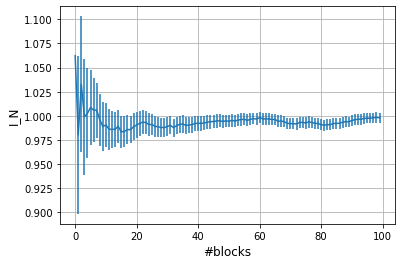

In [26]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

M=10000               # Total number of throws
N=100                 # Number of blocks
L=int(M/N)            # Number of throws in each block, please use for M a multiple of N
x = np.arange(N)      # [0,1,2,...,N-1]
    
#x*=L # Number of throws = block * (Number of throws in each block)
I_N_prog = np.loadtxt("I_N_prog1.txt") 
I_N_err_prog = np.loadtxt("I_N_err_prog1.txt")
#plt.figure(figsize=(10,6))
plt.errorbar(x,I_N_prog,yerr=I_N_err_prog)
plt.xlabel('#blocks', fontsize=12)
#plt.ylim(-0.010,0.015)
plt.ylabel('I_N', fontsize=12)
plt.grid(True)
plt.show()

<span style="color:green"> Al crescere del numero di blocchi considerati la stima dell'integrale tende al valore esatto (1).

<span style="color:green"> IMPORTANCE SAMPLING
    
<span style="color:green"> Se si considera l'integranda come il prodotto di una $g(x)$ per una distribuzione di probabilità $p(x)$, in base alla scelta di $p(x)$ cambia la varianza $\sigma_I^2$. Nel caso sopra abbiamo implicitamente assunto $p(x)=1$, ora prendiamo una $p(x)$ il più possibile simile all'integranda, ad esempio $p(x)=2(1-x)$. Per campionarla, se estraiamo degli $y$ uniformemente distribuiti in $[0,1]$, otteniamo che $x=1+\sqrt{1-y}$ è distribuita come $p(x)$; il resto come sopra.

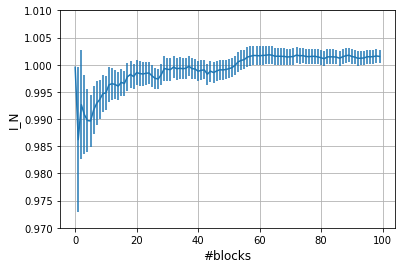

In [27]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

M=10000               # Total number of throws
N=100                 # Number of blocks
L=int(M/N)            # Number of throws in each block, please use for M a multiple of N
x = np.arange(N)      # [0,1,2,...,N-1]
    
#x*=L # Number of throws = block * (Number of throws in each block)
I_N_prog = np.loadtxt("I_N_prog2.txt") 
I_N_err_prog = np.loadtxt("I_N_err_prog2.txt")
#plt.figure(figsize=(10,6))
plt.errorbar(x,I_N_prog,yerr=I_N_err_prog)
plt.xlabel('#blocks', fontsize=12)
plt.ylim(0.970,1.010)
plt.ylabel('I_N', fontsize=12)
plt.grid(True)
plt.show()

<span style="color:green"> Anche in questo caso al crescere del numero di blocchi considerati la stima dell'integrale tende al valore esatto (1); questa volta, però, la varianza è inferiore (come si può vedere nel confronto tra i due casi riportato appena sotto).

<span style="color:green"> In generale, nel calcolo di un integrale col metodo MC più la $p(x)$ che considero assomiglia all'integranda, più la varianza si riduce.

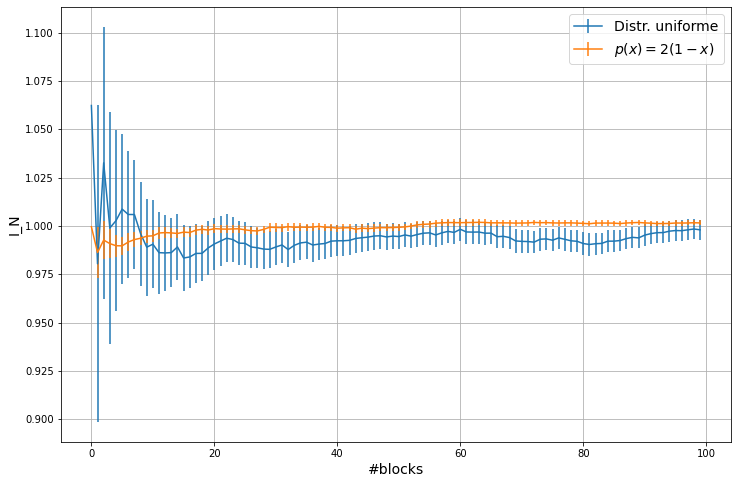

In [25]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

M=10000               # Total number of throws
N=100                 # Number of blocks
L=int(M/N)            # Number of throws in each block, please use for M a multiple of N
x = np.arange(N)      # [0,1,2,...,N-1]
    
#x*=L # Number of throws = block * (Number of throws in each block)
I_N_prog1 = np.loadtxt("I_N_prog1.txt")
I_N_err_prog1 = np.loadtxt("I_N_err_prog1.txt")
I_N_prog2 = np.loadtxt("I_N_prog2.txt") 
I_N_err_prog2 = np.loadtxt("I_N_err_prog2.txt")
plt.figure(figsize=(12,8))
plt.errorbar(x,I_N_prog1,yerr=I_N_err_prog1, label='Distr. uniforme')
plt.errorbar(x,I_N_prog2,yerr=I_N_err_prog2, label='$p(x)=2(1-x)$')
plt.xlabel('#blocks', fontsize=14)
plt.ylabel('I_N', fontsize=14)
plt.legend(fontsize=14)
plt.grid(True)
plt.show()

### Exercise 02.2
- <span style="color:red">3D Random Walks (RW) on a cubic lattice and in the continuum:</span> Repeat many times (e.g. say $10^4$) the simulation of a random walk in 3D always starting at the origin

1. on a cubic lattice with lattice constant $a=1$; at each discrete time the walker makes a forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$
2. in the continuum; at each discrete time the walker makes a step of length equal to $a(=1)$ along a **random direction** obtained by sampling **uniformly** the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$

<span style="color:red">Show a picture of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ for both RWs</span>, with their statistical uncertainties, as function of the step $i\in [0,10^2]$.

Suggestion: divide your $M$ throws into a reasonable number of blocks, compute $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ as function of the step $i\in [0,10^2]$ in each block and use these values (for fixed $i$) to obtain the average value and its statistical uncertainty.

Note that you could try to fit both results with a function like $f(N)=k\sqrt{N}$. Do your results indicate a diffusive behavior?

<span style="color:green"> Si generano $10^4$ RWs ciascuno di 100 step, li si divide in 100 blocchi da 100 e in ciascun blocco si calcolano i valori medi delle posizioni ad ognuno dei 100 step. Si ottengono i valori medi delle posizioni ad ogni step come media dei valori medi dei blocchi e l'incertezza col blocking method. 
    
<span style="color:green"> Nel primo caso i RWs sono su reticolo cubico con a=1 e spostamento ad ogni step di +/- 1 lungo uno dei tre assi.

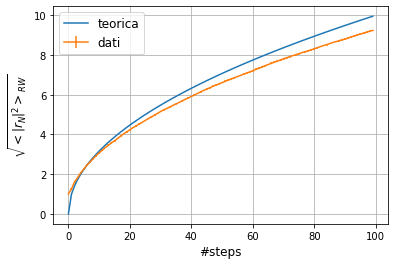

In [34]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

N=100                 # Number of steps
x = np.arange(N)      # [0,1,2,...,N-1]
f = np.sqrt(x)
plt.plot(x,f, label='teorica')
S = np.loadtxt("media_blocchi1.txt") 
E = np.loadtxt("errore_blocchi1.txt")
plt.errorbar(x,S,yerr=E, label='dati')
plt.xlabel('#steps', fontsize=12)
#plt.ylim(-0.010,0.015)
plt.ylabel('$\sqrt{<|r_N|^2>_{RW}}$', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

<span style="color:green"> Nel secondo caso i passi sono di lunghezza a=1 in direzione casuale nello spazio 3D.

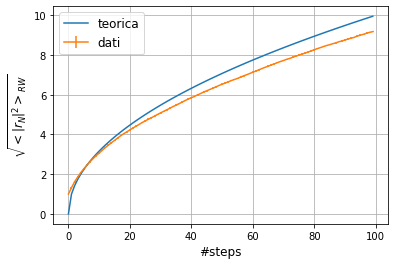

In [35]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

N=100                 # Number of steps
x = np.arange(N)      # [0,1,2,...,N-1]
f = np.sqrt(x)
plt.plot(x,f, label='teorica')
S = np.loadtxt("media_blocchi2.txt") 
E = np.loadtxt("errore_blocchi2.txt")
plt.errorbar(x,S,yerr=E, label='dati')
plt.xlabel('#steps', fontsize=12)
#plt.ylim(-0.010,0.015)
plt.ylabel('$\sqrt{<|r_N|^2>_{RW}}$', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

<span style="color:green"> In entrambi i casi è stata rappresentata in arancione la funzione $f = k\sqrt{N}$ con $k=1$ e $N$ da 1 a 100 (step): l'accordanza degli andamenti rispecchia in entrambi i casi il comportamento diffusivo del fenomeno.